# Heart Disease Classification Project
## Problem Introduction & Motivation

Heart disease is one of the leading causes of death worldwide. Early detection and accurate prediction can significantly improve patient outcomes and reduce healthcare costs.  
In this project, our goal is to **build a classification model** that predicts whether a patient is likely to have heart disease based on five key medical characteristics.

The dataset provided (`heart_disease.csv`) contains medical information for around 300 patients. Each row represents one patient, and the **target variable** indicates whether they were diagnosed with heart disease (1 = disease present, 0 = no disease).

This exercise will walk through the **entire machine learning workflow**, focusing on:
1. Problem Definition and Motivation  
2. Data Preparation (EDA)  
3. Model Selection  
4. Model Evaluation  

By organizing these steps in a reusable Jupyter Notebook template, we ensure future ML projects are structured, efficient, and easy to replicate.
**bold text**

# 1. Dataset Description

* Target Variable: heart_disease (binary: 0 = No heart disease, 1 = Heart disease)

  - Predictor Variables:

    - age

    - sex

    - max_heart_rate

    - angina_level

    - non_anginal_pain

## 2. Data Preparation (EDA)
### 1. Loading the Data
### 2. Data Cleaning
### 3. Handling Missing Data
### 4. Transforming Variables
### 5. Summarizing and Visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Verify the current working directory
import os
print(f"Current working directory: {os.getcwd()}")

# change working directory based on your preference. Mine is the directory named 'Colab Notebooks' in MyDrive)
%cd /content/drive/MyDrive/Colab Notebooks

print(f"Current working directory: {os.getcwd()}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/My Drive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks
Current working directory: /content/drive/MyDrive/Colab Notebooks


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   heart_disease     297 non-null    int64  
 1   age               268 non-null    float64
 2   sex               297 non-null    object 
 3   max_heart_rate    297 non-null    int64  
 4   angina_level      277 non-null    object 
 5   non_anginal_pain  297 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 14.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 296
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   heart_disease     274 non-null    int64  
 1   age               274 non-null    float64
 2   sex               274 non-null    object 
 3   max_heart_rate    274 non-null    int64  
 4   angina_level      274 non-null    object 
 5   non_anginal_pain  274 no

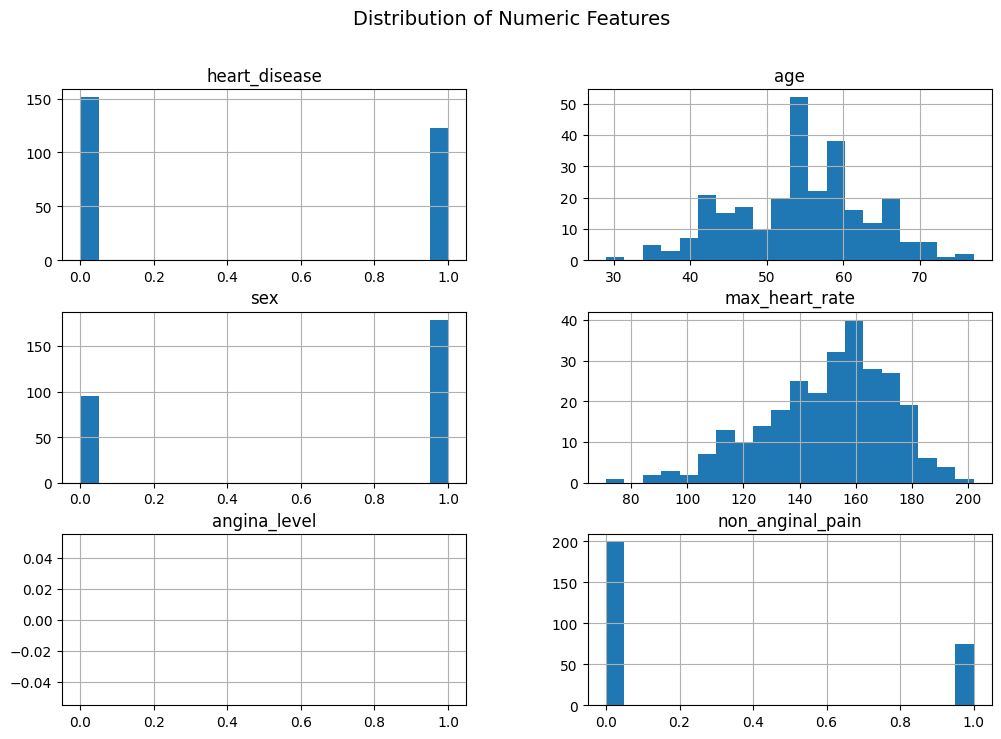

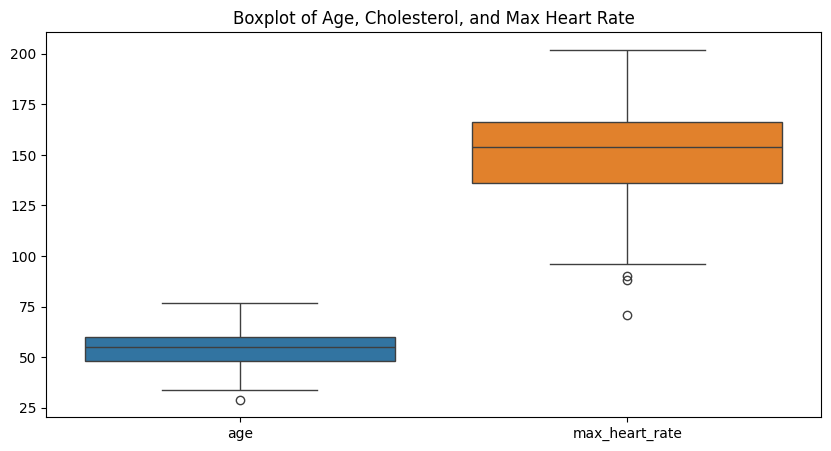

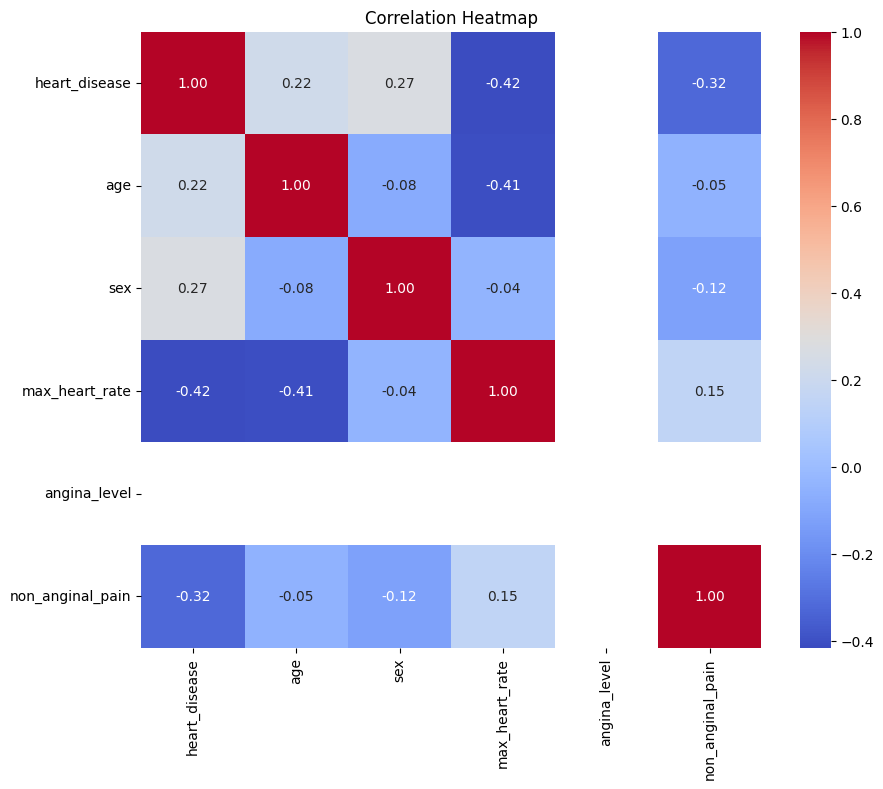

<Figure size 1000x500 with 0 Axes>

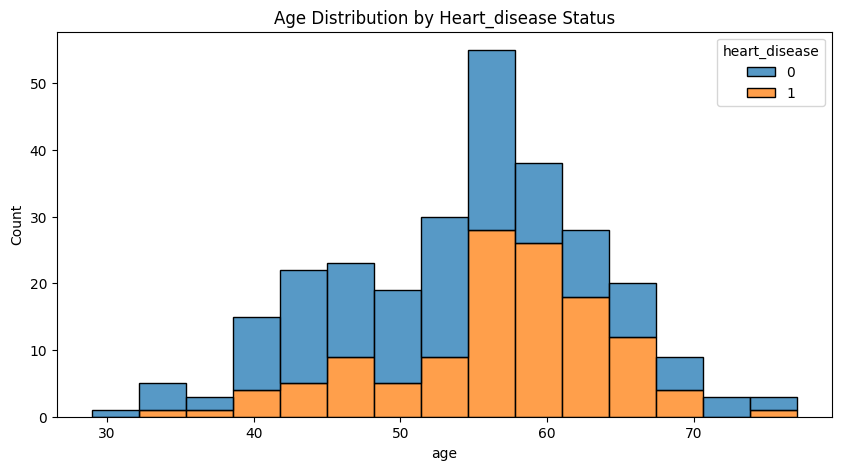

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 Loading the Data

# Load dataset
df = pd.read_csv('heart_disease.csv')

# Display info
df.info()
df.head()

# 2.2 Summary statistics and missing values

df.describe()

# Check missing values
df.isnull().sum()

# 2.3 Data Cleaning

# Remove negative max_heart_rate values safely
df_clean = df[df['max_heart_rate'] >= 0].copy()

# Handle missing values properly
df_clean.loc[:, 'age'] = df_clean['age'].fillna(df_clean['age'].median())

# Drop rows with missing angina_level (example categorical variable)
df_clean = df_clean.dropna(subset=['angina_level'])

# Confirm clean data
df_clean.info()

# 2.4 Encode categorical variables

# Encode 'sex' and 'angina_level' properly
df_clean['sex'] = df_clean['sex'].map({'male': 1, 'female': 0})
df_clean['angina_level'] = df_clean['angina_level'].map({'typical': 1, 'atypical': 0})

# 2.5 Visualization

# Histograms for numeric variables
df_clean.hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Numeric Features", fontsize=14)
plt.show()

# Determine the correct cholesterol column name dynamically
chol_cols = [c for c in df_clean.columns if 'chol' in c.lower()]
chol_col = chol_cols[0] if len(chol_cols) > 0 else None

# Boxplot visualization for key continuous features
plt.figure(figsize=(10,5))
num_cols = ['age', 'max_heart_rate']
if chol_col:
    num_cols.append(chol_col)

sns.boxplot(data=df_clean[num_cols])
plt.title("Boxplot of Age, Cholesterol, and Max Heart Rate")
plt.show()

# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Distribution comparison by target
plt.figure(figsize=(10,5))
# Identify the target column dynamically (binary 0/1 or yes/no column)
possible_targets = [c for c in df_clean.columns if 'target' in c.lower()
                    or 'disease' in c.lower()
                    or 'diagnosis' in c.lower()]
target_col = possible_targets[0] if len(possible_targets) > 0 else None

# Plot distribution comparison if target column exists
plt.figure(figsize=(10,5))
if target_col:
    sns.histplot(data=df_clean, x='age', hue=target_col, multiple='stack', bins=15)
    plt.title(f"Age Distribution by {target_col.capitalize()} Status")
else:
    sns.histplot(data=df_clean, x='age', bins=15)
    plt.title("Age Distribution (Target Column Not Found)")

In [ ]:
import os

print("Files in current directory:")
print(os.listdir('.'))

print("\nFiles in /content directory:")
print(os.listdir('/content'))

Files in current directory:
['Week1_MachineLearning.ipynb', 'Week2_EDA Data.csv', 'Week2_EDA Data_Exercise.csv', 'Week2_EDA.html', 'heart_disease.csv', 'Week2_EDA.ipynb', 'Week3A_BostonHousingDataSet.csv', 'Week3A_SimpleLinearRegression.ipynb', 'Cho_Kyuhyeon_hw1.ipynb']

Files in /content directory:
['.config', 'drive', 'sample_data']


In [ ]:
# Install nbconvert, the tool that handles notebook conversion
!pip install nbconvert

# Try to find the notebook's name automatically.
# This part is a bit of a trick in Colab, as it doesn't have a simple variable for it.
# We'll default to the name from your assignment if we can't find it.
import os
import re

try:
    # Get the list of all running notebook sessions
    sessions = !curl -s http://127.0.0.1:9000/api/sessions

    # Find the session that matches the current notebook's path (which is always /content/drive/MyDrive/Colab Notebooks/ in your case)
    # Note: This is specific to your %cd command from earlier.
    current_path_pattern = re.compile(r"drive/MyDrive/Colab Notebooks/(.*\.ipynb)")
    nb_name = None

    for session in sessions:
        match = current_path_pattern.search(session)
        if match:
            nb_name = match.group(1)
            break

    if not nb_name:
        print("Could not automatically find notebook name, using default.")
        nb_name = "Cho_Kyuhyeon_hw1.ipynb"

except Exception as e:
    print(f"Error finding notebook name, using default: {e}")
    nb_name = "Cho_Kyuhyeon_hw1.ipynb"

print(f"Exporting notebook: {nb_name}")

# Run the conversion command
# This will create an HTML file with the same name (e.g., "Cho_Kyuhyeon_hw1.html")
# The HTML file will appear in your Google Drive in the 'Colab Notebooks' folder.
!jupyter nbconvert --to html "{nb_name}"

Could not automatically find notebook name, using default.
Exporting notebook: Cho_Kyuhyeon_hw1.ipynb
[NbConvertApp] Converting notebook Cho_Kyuhyeon_hw1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 500102 bytes to Cho_Kyuhyeon_hw1.html


## 3. Model Selection

Based on the structure of the data (binary classification), a Logistic Regression model is a simple and appropriate starting point. Other suitable models for comparison in future experiments could include Decision Trees and Random Forests.



## 4. Model Evaluation

To evaluate the classification model, we can use:

Accuracy: Proportion of correct predictions

Precision: Ratio of true positives to all predicted positives

Recall: Ratio of true positives to all actual positives

F1 Score: Harmonic mean of precision and recall

Confusion Matrix: Provides insight into true/false positive and negative rates

ROC AUC: Evaluates the trade-off between sensitivity and specificity